<a href="https://colab.research.google.com/github/pablillo77/data_science_1/blob/main/ProyectoDS_ParteI_Gimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

---

**Título: Exploración preliminar del dataset de Kaggle sobre Diabetes, basado en "Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females" para comprender la distribución y relaciones en un conjunto de datos multidimensional**

**Resumen:**
Este estudio presenta una exploración preliminar de un dataset multidimensional basado en información del National Institute of Diabetes and Digestive and Kidney Diseases.El objetivo es comprender su estructura, distribución y posibles relaciones entre variables. Se utilizó un enfoque de análisis descriptivo y visualización de datos para examinar un conjunto de datos compuesto por información de parámetros que pueden incidir o no en el desarrollo de Diabetes, una funcion de scoring y un Outcome (Diabetes/No diabetes). Inicialmente, se realizó una exploración de la estructura del dataset, revelando un total de 768 observaciones y 9 variables. Luego, se calcularon estadísticas descriptivas para cada variable, proporcionando información sobre la media, mediana, desviación estándar y valores extremos.

Además, se llevaron a cabo visualizaciones univariadas y multivariadas para explorar la distribución de variables individuales y las relaciones entre pares de variables. Se identificaron [número de valores atípicos] valores atípicos en el dataset, los cuales serán objeto de un análisis más detallado en investigaciones posteriores. Se observaron también relaciones significativas entre ciertas variables, como se evidenció en la matriz de correlación y en las visualizaciones de datos multivariados.

En conjunto, estos resultados preliminares proporcionan una comprensión inicial de la estructura y la naturaleza de los datos, lo que servirá como base para análisis más avanzados y la construcción de modelos predictivos en investigaciones futuras.

---

Este abstract ofrece una visión general de los pasos y resultados clave obtenidos durante la exploración preliminar del dataset, lo que permite a los lectores comprender rápidamente la naturaleza y el alcance del estudio.

Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf

# Importamos las librerias que utilizaremos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
mpl.style.use('ggplot')

In [3]:
url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url)


# A continuación se agregan las definiciones de los campos:
Pregnancies: Expresa la cantidad de embarazos

Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

BloodPressure: Presión diastólica en mmHg

SkinThickness: Espesor de la piel en el ticeps en mm

Insulin: Nivel de insulina en sangre en uU/ml

BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

#Estructura y resumen estadístico

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
print("Las dimensiones del dataset son: ")
df.shape


Las dimensiones del dataset son: 


(768, 9)

## Análisis de datos faltantes. Se evidencian valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procede a reemplazarlos por NaN para su posterior análisis.

In [17]:
df_nan = df.copy(deep=True) #creo una copia para mantener el original
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan)



In [18]:
print(df_nan.isna().sum()) #valores con su conteo de NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
# Calcular el coeficiente de variación para la glucosa y la insulina
coef_var = (df_nan["Glucose"].std() / df_nan['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df_nan["Insulin"].std() / df_nan['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df_nan["SkinThickness"].std() / df_nan['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df_nan["BMI"].std() / df_nan['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)
coef_var = (df_nan["BloodPressure"].std() / df_nan['BloodPressure'].mean() *100).round(2)
print("El coeficiente de variación para la BloodPressure es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34
El coeficiente de variación para la BloodPressure es:
 17.1


## Entendemos que de los valores con datos faltantes, Glucose, BMI y BloodPressure presentan una distribución simétrica. Se utilizará entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN

In [19]:
df_nan["Glucose"].fillna(df_nan["Glucose"].mean(), inplace=True)
df_nan["BloodPressure"].fillna(df_nan["BloodPressure"].mean(), inplace=True)
df_nan["BMI"].fillna(df_nan["BMI"].mean(), inplace=True)
print(df_nan.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [20]:
df_nan=df_nan.dropna()
print(df_nan.isna().sum())
df_nan.shape #verifico que quedamos ahora con 394 filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(394, 9)

##Graficos con matplotlib univariados

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

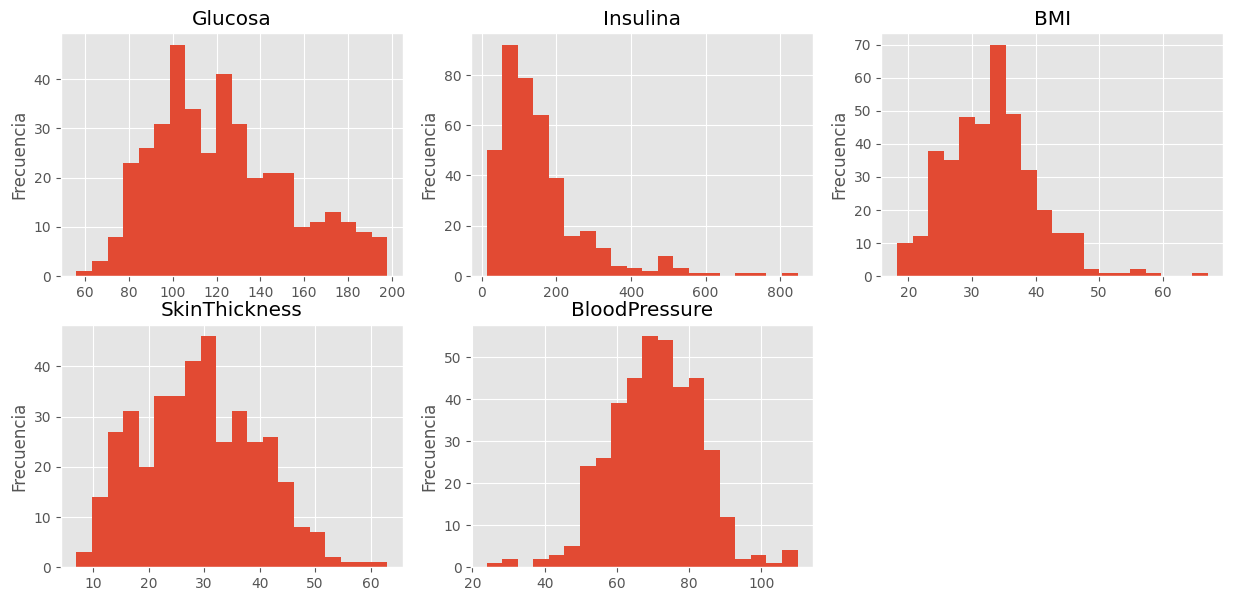

In [31]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_nan['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_nan['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_nan['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_nan['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_nan['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

## Análisis de correlación

<Axes: >

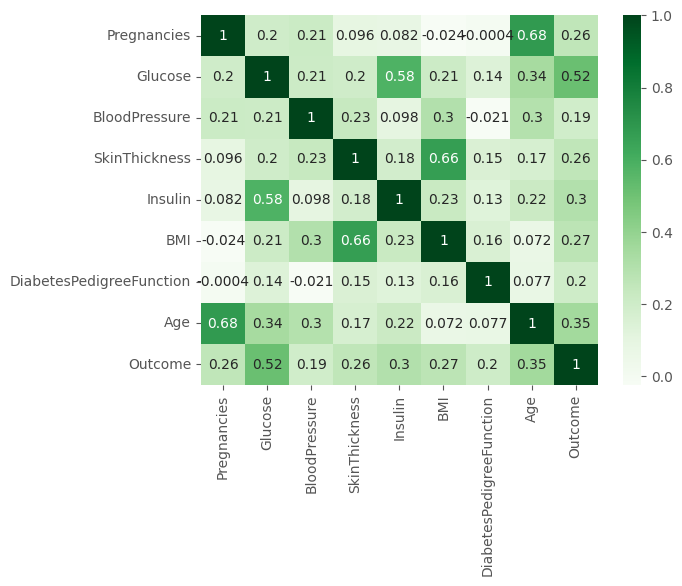

In [14]:
matrix = df_nan.corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

## Visualización de datos multivariados

Text(0, 0.5, 'Insulina (uU/ml)')

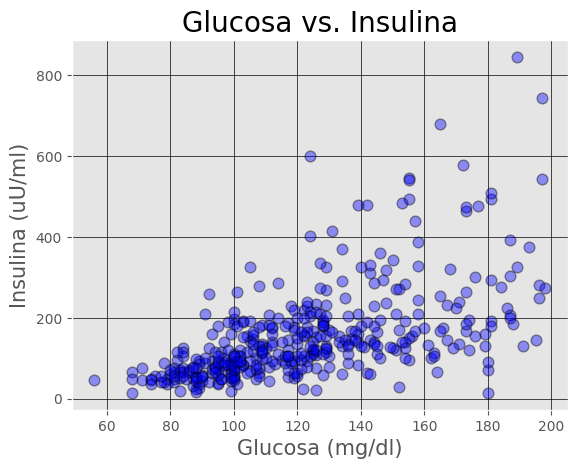

In [32]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["Glucose"], df_nan["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k")
ax.set_title('Glucosa vs. Insulina', fontsize=20)
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


Text(0, 0.5, 'BMI')

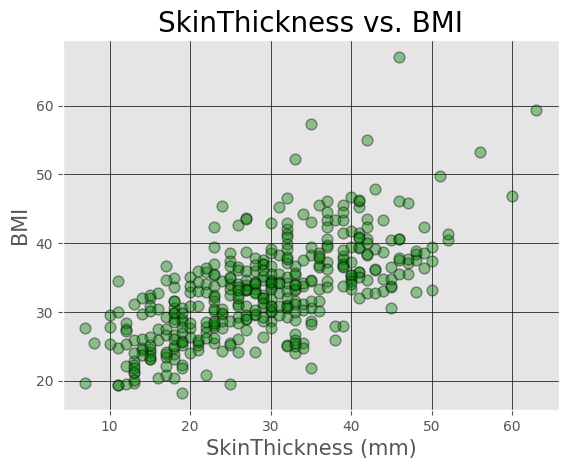

In [33]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["SkinThickness"], df_nan["BMI"], alpha=0.4, facecolor="green", linewidths=1, s=60, edgecolor="k")
ax.set_title('SkinThickness vs. BMI', fontsize=20)
ax.set_xlabel('SkinThickness (mm)', fontsize=15)
ax.set_ylabel('BMI', fontsize=15)

## De acuerdo al "Outcome" realizaré un recuento para un gráfico de barras utilizandolo como variable categórica:

Pregnancies                 category
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

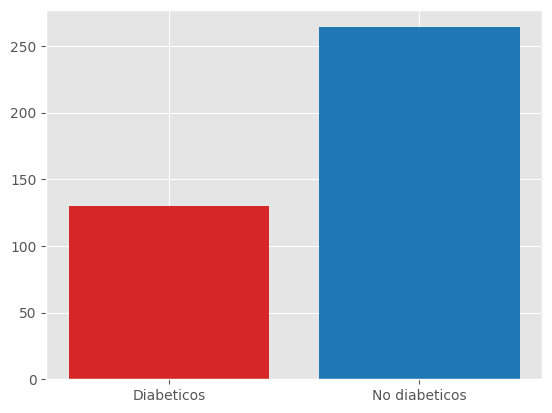

In [37]:
df_nan["Pregnancies"]=df_nan["Pregnancies"].astype('category')
df_nan.Outcome=df_nan.Outcome.astype('category')

fig, ax = plt.subplots()
counts = [df_nan['Outcome'].value_counts()[1], df_nan["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors)
df_nan['Outcome'].value_counts()

df_nan.dtypes


In [39]:
df_nan.describe(include='category')

,Pregnancies,Outcome
count,394,394
unique,17,2
top,1,0
freq,94,264


## Realizo los mismos histogramas de Glucosa e Insulina pero utilizando seaborn

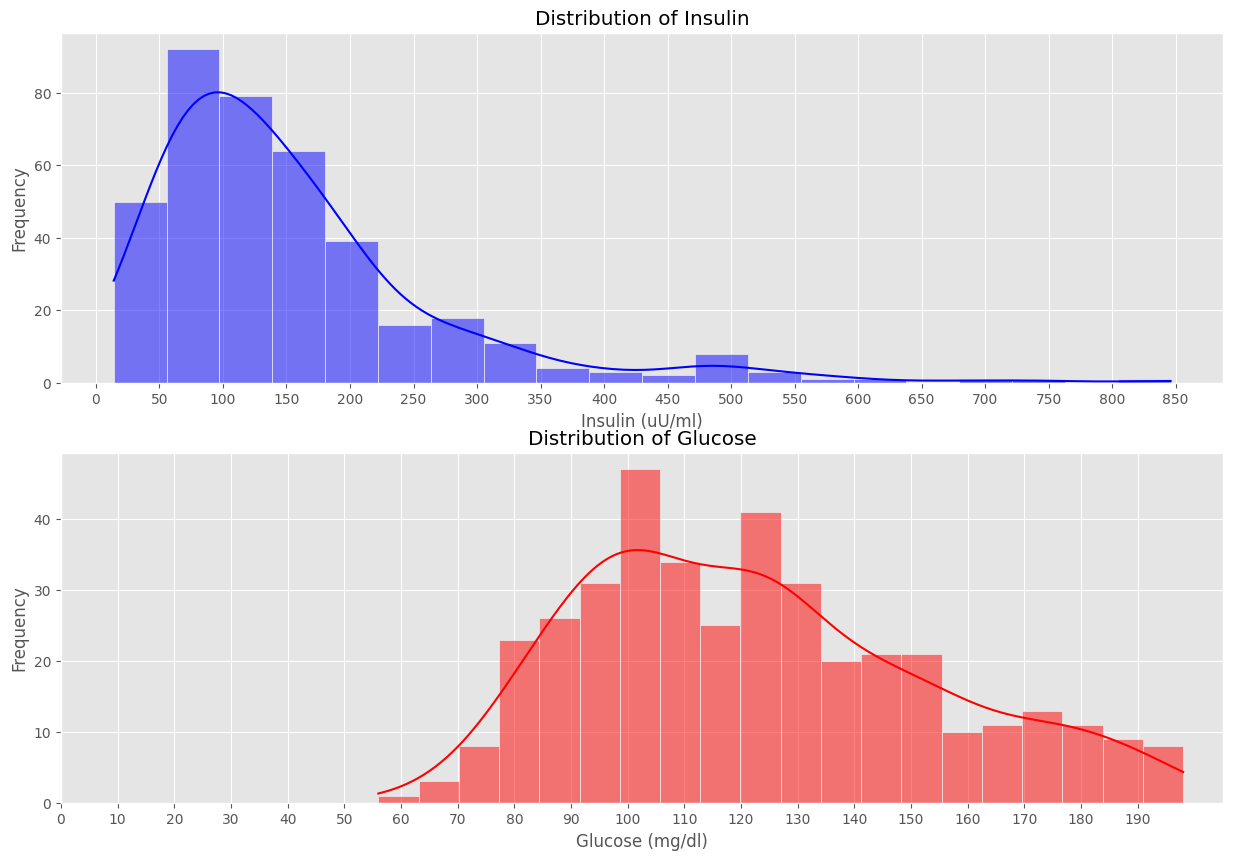

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=df_nan, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50))
sns.histplot(data=df_nan, x="Glucose", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10))
plt.show()


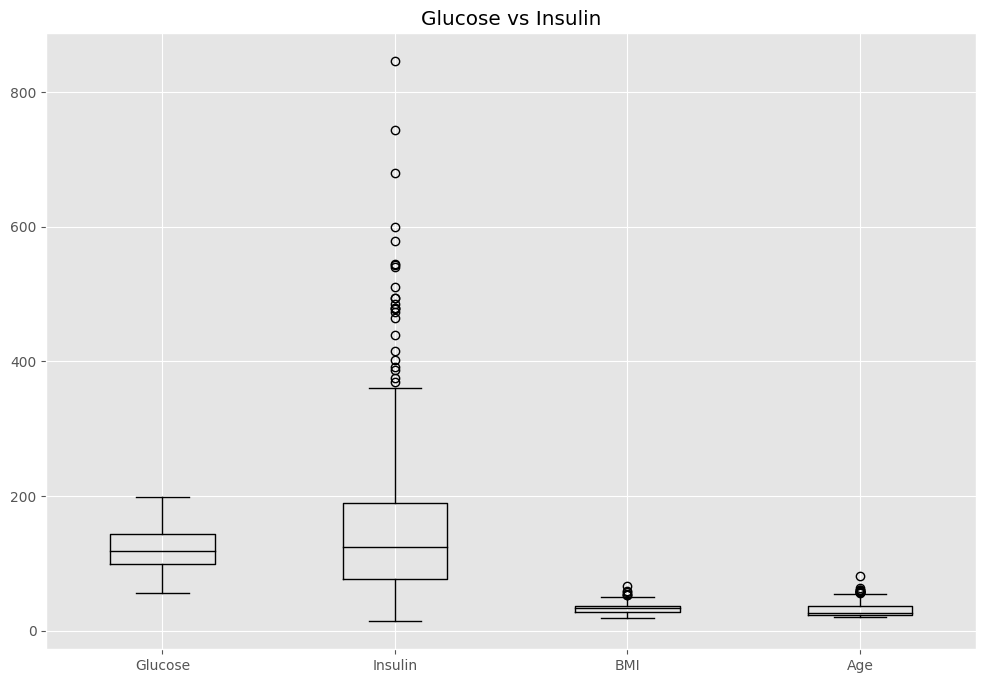

In [41]:
df_nan[['Glucose', 'Insulin', "BMI", "Age"]].plot(kind='box', color="k", title='Glucose vs Insulin', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


In [ ]:
# prompt: Show values where "DiabetesPedigreeFunction" is > 1

df.loc[df['DiabetesPedigreeFunction'] >= 2.42]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.42,25,1


In [42]:
df_nan.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.613418,70.654822,29.106599,155.548223,33.070958,0.525543,30.814721,0.329949
std,3.209635,30.783073,12.469919,10.504273,118.775855,7.015073,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some dataset descriptions

Columns names,dastaset stats description and colum types

In [ ]:
print("Dataset´s columns are: ")
df.columns

Dataset´s columns are: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Checking some relations between data, seems that high glucose levels have better correlation with high insulin rather than bloodPressure

In [45]:
df.loc[df.Glucose >= 120, 'BloodPressure']

0      72
2      64
4      40
8      70
9      96
       ..
759    92
761    74
764    70
765    72
766    60
Name: BloodPressure, Length: 360, dtype: int64

In [50]:
print(df_nan['Glucose'].corr(df['BloodPressure']))
print((df_nan.Glucose >= 120).corr(df['Insulin']))
print((df_nan.Outcome).corr(df['DiabetesPedigreeFunction']))

0.21010818390455324
0.47878085608082877
0.200759482174838
